# Notebook for accessing GCI Alaska Data

In [31]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

In [32]:
#define filepaths
kkfls = "F:/GitHub_files/FM_Segmentation_DAS/src/data/kkfls_2023-12-02_08.30.57_UTC.h5"
terra = "F:/GitHub_files/FM_Segmentation_DAS/src/data/terra_2023-12-02_08.30.56_UTC.h5"

In [33]:
# Load the data
kkfls_load= h5py.File (kkfls, 'r')
kkfls_data = kkfls_load['Acquisition/Raw[0]/RawData'][:] 
kkfls_time = kkfls_load['Acquisition/Raw[0]/RawDataTime'][:]
kkfls_count = kkfls_load['Acquisition/Raw[0]/RawDataSampleCount'][:] 

In [34]:
# Load the data for terra
terra_load = h5py.File(terra, 'r')
terra_data = terra_load['Acquisition/Raw[0]/RawData'][:] 
terra_time = terra_load['Acquisition/Raw[0]/RawDataTime'][:]
terra_count = terra_load['Acquisition/Raw[0]/RawDataSampleCount'][:]

In [35]:
#display the kkfls_load and terra_load data
print(kkfls_load.keys())
print(terra_load.keys())
print(kkfls_data.shape)
print(terra_data.shape)
print(kkfls_time.shape)
print(terra_time.shape)
print(kkfls_count.shape)
print(terra_count.shape)



<KeysViewHDF5 ['Acquisition']>
<KeysViewHDF5 ['Acquisition']>
(1500, 8530)
(1500, 8530)
(1500,)
(1500,)
(1500,)
(1500,)


In [36]:
sampling_rate = 50 # hz

def highpass_filter(data, cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='high', analog=False)
    y = filtfilt(b, a, data, axis=0)
    return y

# Apply high-pass filter to the data
cutoff_frequency = 1  # 1 Hz
#filtered_data = highpass_filter(data, cutoff_frequency, sampling_rate)

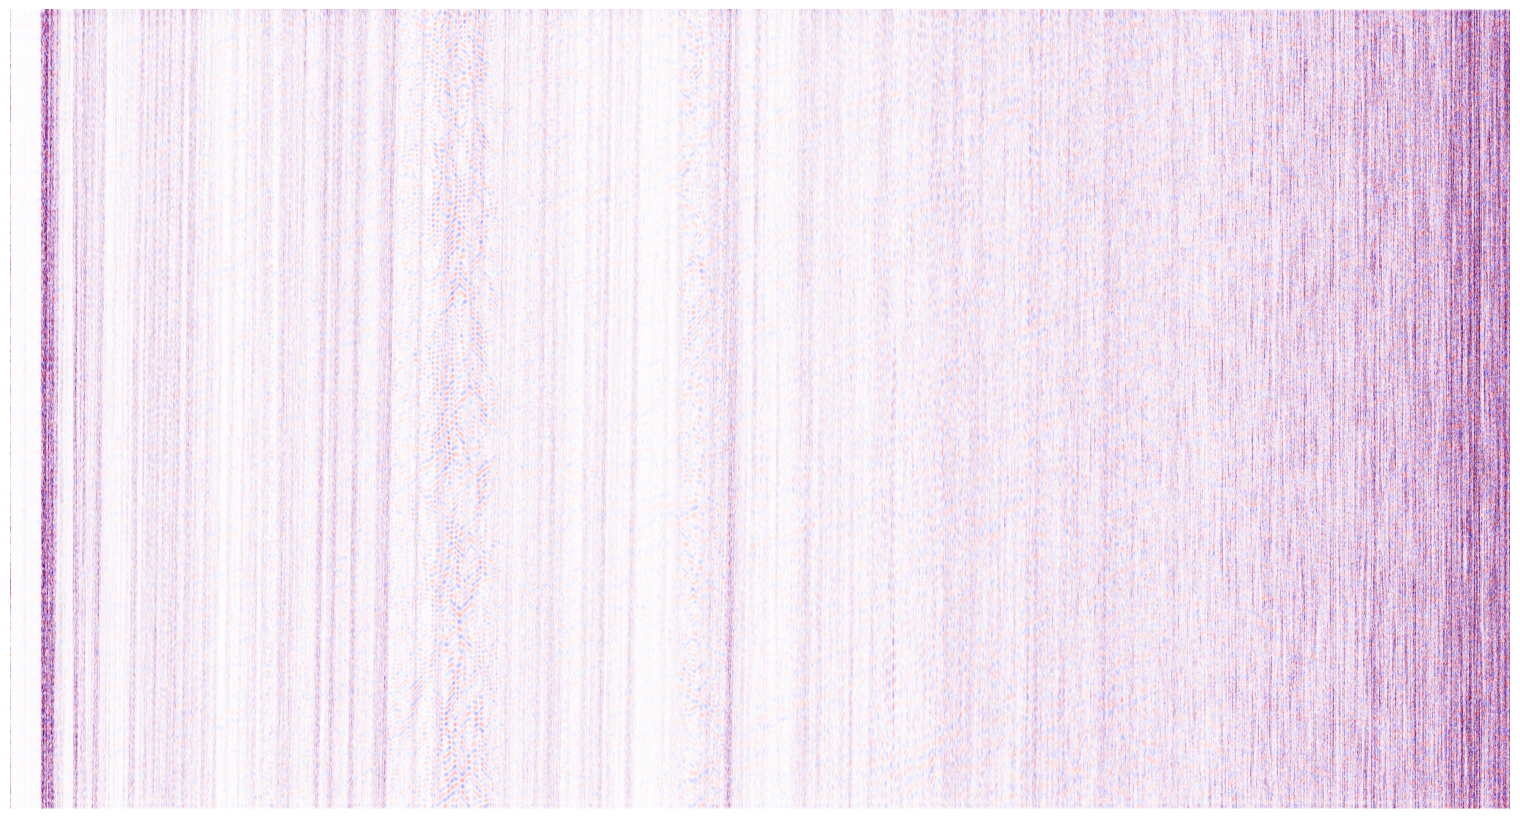

In [38]:
#plot the kkfls data and the terra data
# Convert epoch time to seconds
kkfls_time = np.array([(x - kkfls_time[0]).astype('timedelta64[s]').astype(int) for x in kkfls_time])

# Apply high-pass filter to the data
filtered_data = highpass_filter(kkfls_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector = np.arange(0, kkfls_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data = (filtered_data - np.min(filtered_data)) / (np.max(filtered_data) - np.min(filtered_data)) * 255
#Standardization (zero mean, unit variance)
array_standardized = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Create a figure and axis without borders or extra padding

dmax = np.max(np.abs(array_standardized))

fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(array_standardized, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10, extent=[0, time_vector[-1], data_sample_count[-1], 0])
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)


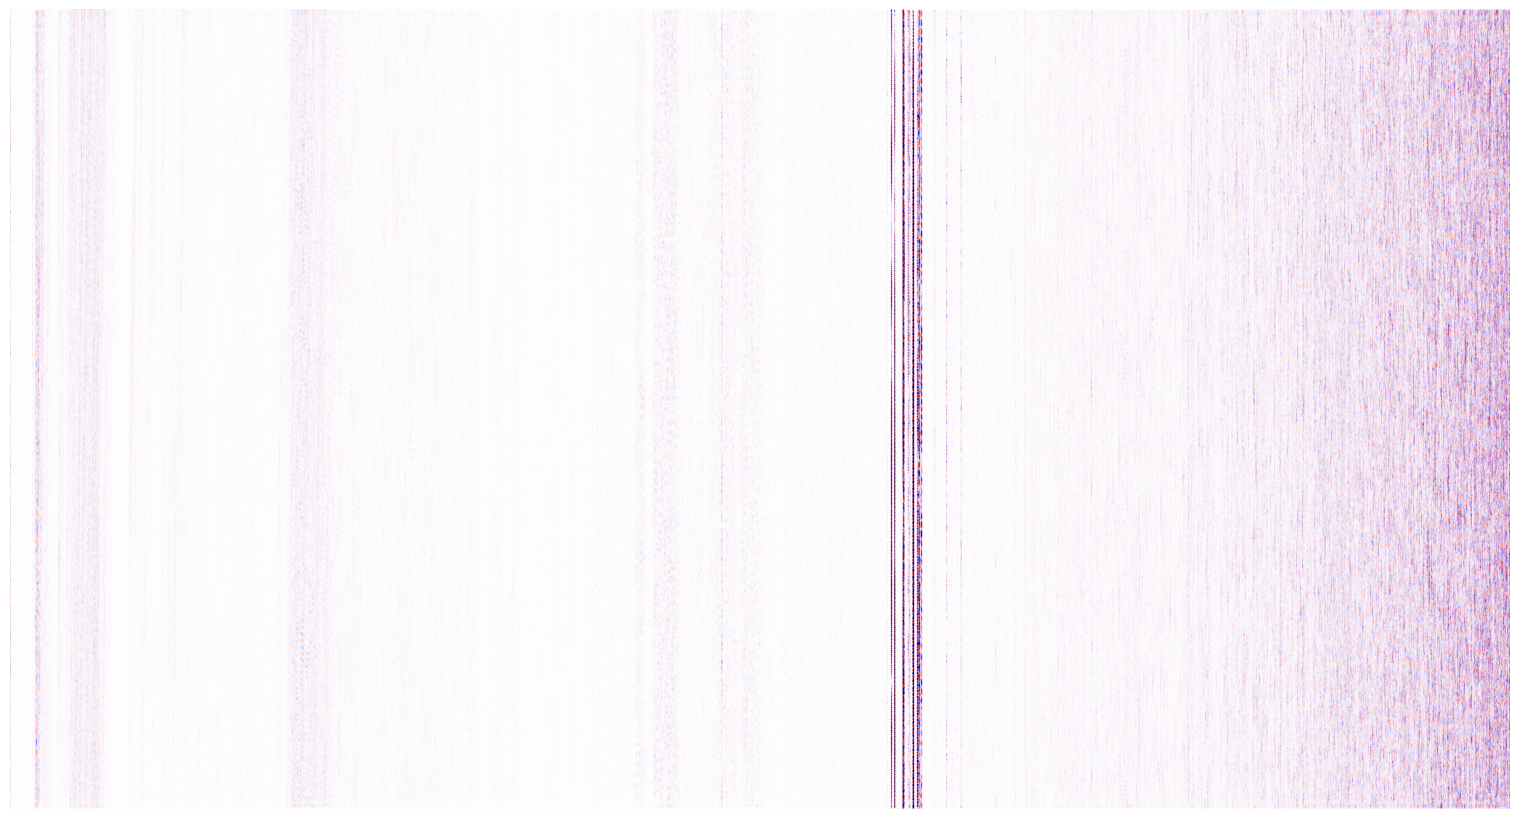

In [39]:
#plot the terra data and the terra data
# Convert epoch time to seconds
terra_time = np.array([(x - terra_time[0]).astype('timedelta64[s]').astype(int) for x in terra_time])

# Apply high-pass filter to the data
filtered_data = highpass_filter(terra_data, cutoff_frequency, sampling_rate)

# Create time vector for plotting
time_vector = np.arange(0, terra_data.shape[0] / sampling_rate, 1 / sampling_rate)

#Normalize the filtered data to the range [0, 255]
normalized_data = (filtered_data - np.min(filtered_data)) / (np.max(filtered_data) - np.min(filtered_data)) * 255
#Standardization (zero mean, unit variance)
array_standardized = (filtered_data - np.mean(filtered_data)) / np.std(filtered_data)

# Create a figure and axis without borders or extra padding

dmax = np.max(np.abs(array_standardized))

fig, ax = plt.subplots(figsize=(15, 8))
ax.imshow(array_standardized, aspect='auto', cmap='seismic', vmin=-dmax/10, vmax=dmax/10, extent=[0, time_vector[-1], data_sample_count[-1], 0])
ax.set_axis_off()
plt.subplots_adjust(left=0, right=1, top=1, bottom=0)
plt.margins(0, 0)
